2.2.0
17861
Best total reward:  -2.9499768886016677
Best total reward ratio1:  0.4566527691333851
Best total reward ratio2:  2.189847664556496
Best total reward roll:  -4.419602008584607
Best total reward roll ratio1:  0.6841489177375553
Best total reward roll ratio2:  1.461670075145259


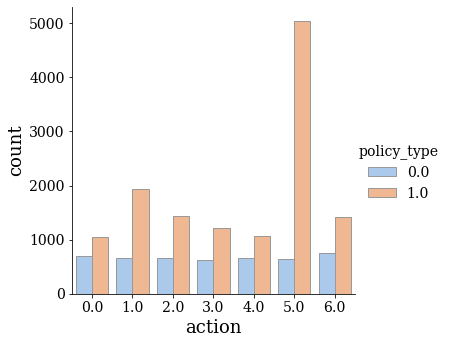

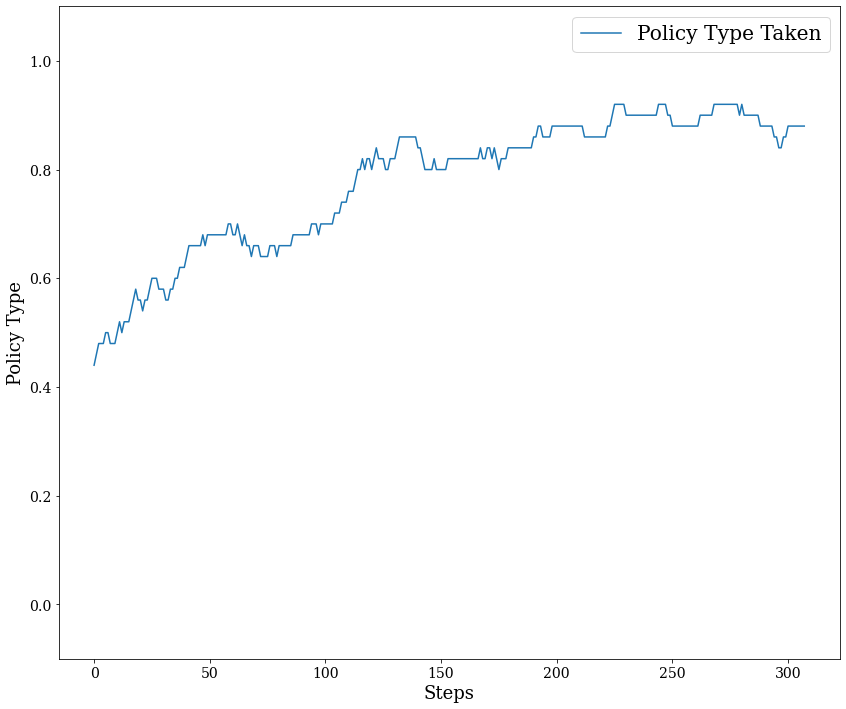

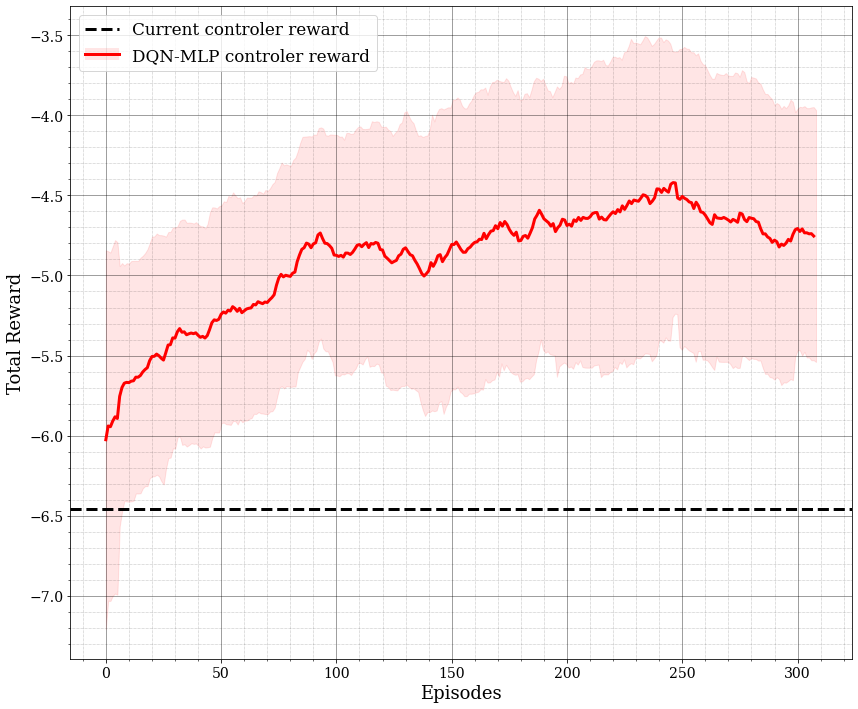

level_0                                                            190
index                                                             9549
current_state        [0.1648407  0.5122873  0.69132835 0.9893894  0...
action                                                               2
reward                                                      -0.0140542
next_state           [0.1648407  0.5122873  0.69132835 0.9893894  0...
total_reward                                                  -2.94998
done                                                              True
policy_type                                                          1
episode                                                            190
policy_type_roll                                                  0.84
total_reward_roll                                             -4.91964
total_reward_std                                              0.923669
Name: 141, dtype: object


In [1]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['font.family'] = [u'serif']
plt.rcParams['font.size'] = 14

## Using DataAnalysis notbook
step100_mean = -17.65001875
step100_std  = 1.553729686751266
##
step100_mean = 39.24#
step100_mean = -6.46#12.17
step100_std =  6.60839952001191

## READ data 
import pandas as pd
import numpy as np
import math, sys
#### Good below ###
#dir_name = '../drivers/results_dqn128_with500warmup_surrogate1_in5_out3_D10122020-T222150_v1/'
dir_name = '../drivers/results_dqn128_gamma85_250warmup_train5_surrogate1_in5_out3_D10132020-T214923_v1/'
# Best MLP (>500)
dir_name = '../drivers/results_dqn_MLP128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10142020-T151949_v1/'
## Best MLP (>1750)
dir_name = '../drivers/results_dqn_MLP128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10142020-T200346_v1/'
## Now LSTM (power bumped killed it)
dir_name = '../drivers/results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T110300_v1/'
## Now
dir_name = '../drivers/results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T163022_v1/'

#### Good below ###
#filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes2500_steps50_D10122020-T222150_batched_memories.log'
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes1000_steps50_D10132020-T214923_batched_memories.log'
# Best MLP (>500)
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes1000_steps50_D10142020-T151949_batched_memories.log'
## Best MLP (>1750)
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes5000_steps50_D10142020-T200346_batched_memories.log'
## Now LSTM (power bumped killed it)
filename1 = dir_name+'fnal_surrogate_dqn_mlp_episodes2000_steps50_D10152020-T110300_batched_memories.log'
## Now
results_dqn_LSTM128_gamma85_250warmup_train5_surrogate1_reward1_in5_out3_D10152020-T163022_v1
frame = pd.read_csv(filename1, sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done','policy_type','episode'])

#print(frame.head())

##
import seaborn as sns
#fig,ax = plt.subplots(figsize=(14,12))
#sns.lineplot(x = "step", y = "action", data = frame, hue = "action")
#sns.boxplot(frame['action'])
#sns.distplot(frame['action'],hue=frame['policy_type'])
sns.catplot(x="action", hue="policy_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=frame)
#plt.plot(frame['action'],label='Action Taken')
#ax.set_ylabel('Fraction')
#ax.set_xlabel('Action')
#plt.legend(fontsize='x-large')
#plt.show()

##
print(len(frame['total_reward']))
frame = frame[frame.done==True] 
frame = frame.reset_index()
max_total_reward = frame['total_reward'].max()
print('Best total reward: ', max_total_reward)
print('Best total reward ratio1: ', max_total_reward/step100_mean)
print('Best total reward ratio2: ', step100_mean/max_total_reward)
## rolling averages ##
rolling_setting = 50

frame['policy_type_roll'] = frame['policy_type'].rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'].rolling(rolling_setting).mean()
frame['total_reward_std'] = frame['total_reward'].rolling(rolling_setting).std()
frame = frame.dropna()
frame = frame.reset_index()
max_total_reward_roll = frame['total_reward_roll'].max()
print('Best total reward roll: ', max_total_reward_roll)
print('Best total reward roll ratio1: ', max_total_reward_roll/step100_mean)
print('Best total reward roll ratio2: ', step100_mean/max_total_reward_roll)

## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()



## Print total reward ##
#frame_done = frame[frame.done==True] 
#frame_done = frame_done.reset_index()
#print(frame_done.total_reward_roll)
#frame_done.total_reward.plot()
fig,ax = plt.subplots(1, 1,figsize=(14,12))
#ax.fill_between(frame['episode'], step100_mean-2*step100_std, step100_mean+2*step100_std, label='2 sigma range', color='green', alpha=0.75)
#ax.fill_between(frame['episode'], step100_mean-step100_std, step100_mean+step100_std,label='1 sigma range', color='yellow', alpha=0.75)
data_line = plt.axhline(y=step100_mean, lw=3,ls='--',color='black', linestyle='-', label='Current controler reward')
#plt.plot(frame['total_reward'],label='Single DQN-MLP reward')
roll_line, = plt.plot(frame['total_reward_roll'],lw=3, color='red')#,label='Single DQN-MLP rolling reward', 
# print(frame['total_reward_roll']-frame['total_reward_std'])
x = np.linspace(0,len(frame['total_reward_roll']),len(frame['total_reward_roll']))
ax.fill_between(x, frame['total_reward_roll']-frame['total_reward_std'], 
                frame['total_reward_roll']+frame['total_reward_std'],
                color='red', alpha=0.1)
shape = ax.fill(np.NaN, np.NaN, 'r', alpha=0.1)
plt.legend([data_line,(roll_line, shape[0]), ], ['Current controler reward','DQN-MLP controler reward'],
           loc='upper left', fontsize='large')
                #label='1 sigma range', color='red', alpha=0.15)
#ax.set_xlabel('Steps')
#ax.set_ylabel('Policy Type')
#plt.xlim(0,1750)
#plt.ylim(-16,0)
#plt.legend([data_line, (line, shape)], ["Current controler reward", "DQN-MLP controler reward"])
#plt.legend(fontsize='x-large')
#fig,ax = plt.subplots(1, 1,figsize=(14,12))
#plt.plot(frame.total_reward_roll, label='Total Reward')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', alpha=0.75,color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.5,color='black')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
plt.savefig(filename1+'.png')
plt.show()

max_idx = frame['total_reward'].argmax()
print(frame.iloc[max_idx])

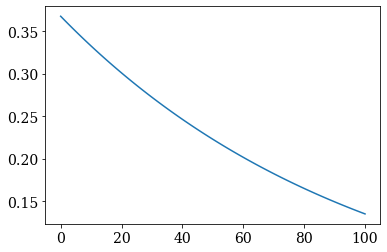

In [29]:
pred=0.1
true=-0.1
x = np.linspace(0,100,100)
pred = np.linspace(0.5,1,100)
true = np.linspace(-0.5,-0.5,100)
#reward1 = np.abs(pred)/np.abs(true)
reward2 = np.exp(-np.abs(pred)/np.abs(true)) ## Try this!!!
#plt.plot(x,reward1)
plt.plot(x,reward2)